<a href="https://colab.research.google.com/github/QuangHuy1124/du_an_da_lam/blob/main/Tr%E1%BB%B1c_quan_h%C3%B3a_d%E1%BB%AF_li%E1%BB%87u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phần 1: Tải và khám phá dữ liệu

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('dataset.csv')
df
data = df.copy()

In [ ]:
# Tạo biến mục tiêu mới
df['Target_Simplified'] = df['Target'].apply(lambda x: 'Success' if x in ['Graduate', 'Enrolled'] else 'Failure')

In [ ]:
print("\nKiểm tra các giá trị ngoại lệ trong các cột điểm số...")

# Các cột điểm số cần kiểm tra
cols_score = ['Curricular units 1st sem (grade)',
              'Curricular units 2nd sem (grade)']

pd.set_option('display.float_format', '{:.2f}'.format)

# Thống kê mô tả để có cái nhìn ban đầu
print(df[cols_score].describe())


Kiểm tra các giá trị ngoại lệ trong các cột điểm số...
       Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)
count                           4424.00                           4424.00
mean                              10.64                             10.23
std                                4.84                              5.21
min                                0.00                              0.00
25%                               11.00                             10.75
50%                               12.29                             12.20
75%                               13.40                             13.33
max                               18.88                             18.57


- Trung bình điểm của sinh viên ở kỳ 1 là ~ 10.64, ở kỳ 2 là ~ 10.23 phản ánh mức độ học lực trung bình khá.
- Độ lệch chuẩn (std) nằm trong khoảng 4.8 – 5.2 cho thấy điểm số phân tán khá rộng quanh giá trị trung bình, có sinh viên điểm rất thấp và cũng có sinh viên điểm rất cao.
- Điểm tối thiểu ở cả hai kỳ đều là 0.00 (tương ứng với việc không đạt hoặc rớt môn) và điểm cao nhất ở kỳ 1 là 18.88 và  ở kỳ 2 là 18.57
- 25% sinh viên có điểm kỳ 1 ≤ 11.00 và kỳ 2 ≤ 10.75.
- 50% sinh viên đạt từ 12 điểm trở lên.
- 75% sinh viên có điểm ≤ 13.4 (kỳ 1) và ≤ 13.33 (kỳ 2).

# Phần 2: Phân tích dữ liệu thăm dò EDA

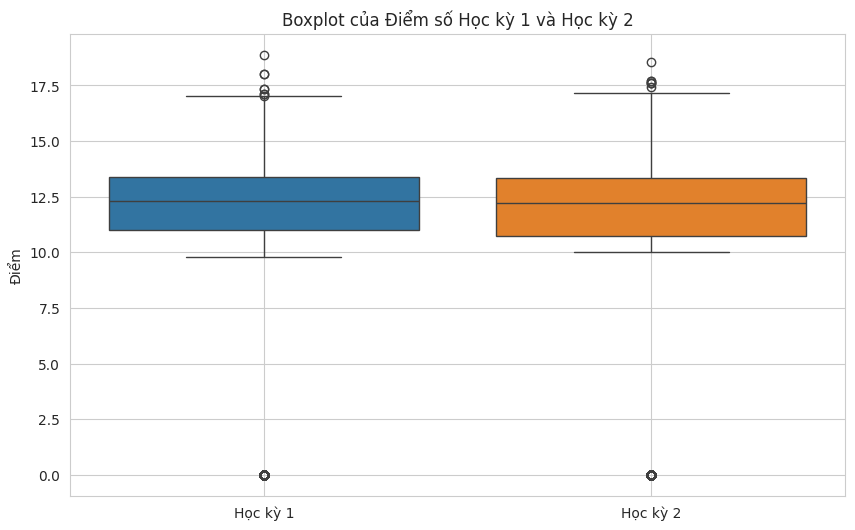

In [ ]:
# Chọn các cột điểm số để vẽ boxplot
score_columns = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]

# Thiết lập kiểu hiển thị cho biểu đồ
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[score_columns])
plt.title('Boxplot của Điểm số Học kỳ 1 và Học kỳ 2')
plt.ylabel('Điểm')
plt.xticks(ticks=range(len(score_columns)), labels=['Học kỳ 1', 'Học kỳ 2'])
plt.grid(True)

# Lưu biểu đồ

plt.show()

In [ ]:
# Chọn các đặc trưng để phân tích
features = [
    'Scholarship holder',
    'Debtor',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Mother\'s occupation',
    'Father\'s occupation'
]

# Phân tích thống kê mô tả
print("\nThống kê mô tả theo nhóm Success và Failure:")
grouped_stats = df.groupby('Target_Simplified')[features].agg({
    'Scholarship holder': 'mean',
    'Debtor': 'mean',
    'Curricular units 1st sem (grade)': 'mean',
    'Curricular units 2nd sem (grade)': 'mean',
    'Mother\'s occupation': lambda x: x.mode()[0],
    'Father\'s occupation': lambda x: x.mode()[0]
}).round(2)
print(grouped_stats)


Thống kê mô tả theo nhóm Success và Failure:
                   Scholarship holder  Debtor  \
Target_Simplified                               
Failure                          0.09    0.22   
Success                          0.32    0.06   

                   Curricular units 1st sem (grade)  \
Target_Simplified                                     
Failure                                        7.26   
Success                                       12.24   

                   Curricular units 2nd sem (grade)  Mother's occupation  \
Target_Simplified                                                          
Failure                                        5.90                   10   
Success                                       12.28                   10   

                   Father's occupation  
Target_Simplified                       
Failure                             10  
Success                             10  


In [ ]:

# Đổi tên cột legend hiển thị (nếu muốn đẹp hơn)
df = df.rename(columns={'Target_Simplified': 'Trạng thái học tập'})



In [ ]:
# ✅ 1) Chuẩn hóa Target -> 2 lớp EN (ăn cả VN/EN)
map_raw_to_binary = {
    'Graduate': 'Success',
    'Enrolled': 'Success',
    'Tốt nghiệp': 'Success',
    'Đang học': 'Success',
    'Dropout': 'Failure',
    'Bỏ học': 'Failure'
}
df['Target_Simplified'] = df['Target'].map(map_raw_to_binary)

# ✅ 2) Tạo cột tiếng Việt để hiển thị legend
df['Trạng thái học tập'] = df['Target_Simplified'].map({
    'Success': 'Thành công',
    'Failure': 'Bỏ học'
})
df['Trạng thái học tập'] = pd.Categorical(
    df['Trạng thái học tập'],
    categories=['Thành công', 'Bỏ học'],
    ordered=True
)

# (Tuỳ chọn) Kiểm tra nhanh
print('Target_Simplified:', df['Target_Simplified'].unique())
print('Trạng thái học tập:', df['Trạng thái học tập'].unique())


Target_Simplified: ['Failure' 'Success']
Trạng thái học tập: ['Bỏ học', 'Thành công']
Categories (2, object): ['Thành công' < 'Bỏ học']


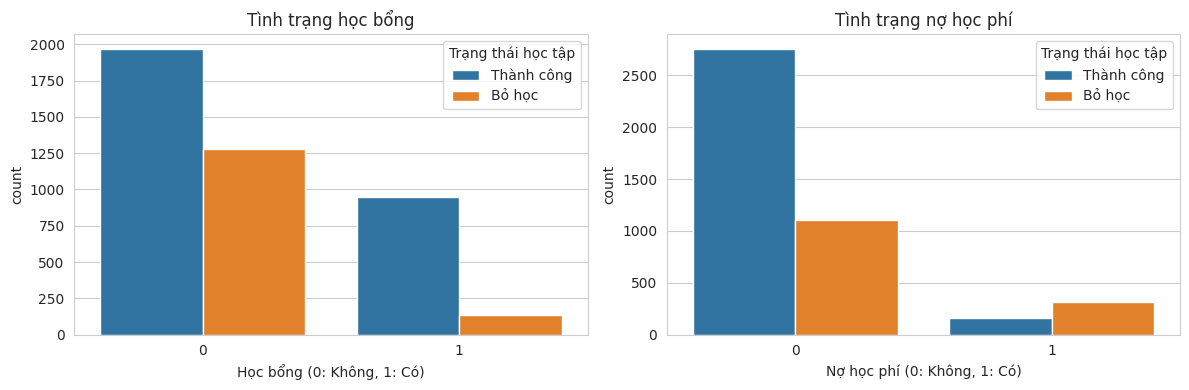

In [ ]:
# Đổi tên trạng thái học tập sang tiếng Việt
df['Target_Simplified'] = df['Target'].replace({
    'Failure': 'Bỏ học',
    'Success': 'Thành công'
})

# Nếu bạn muốn cố định thứ tự hiển thị (Thành công trước, rồi Bỏ học):
order_status = ['Thành công', 'Bỏ học']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Scholarship holder', hue='Trạng thái học tập', data=df)
plt.title('Tình trạng học bổng')
plt.xlabel('Học bổng (0: Không, 1: Có)')
plt.subplot(1, 2, 2)
sns.countplot(x='Debtor', hue='Trạng thái học tập', data=df)
plt.title('Tình trạng nợ học phí')
plt.xlabel('Nợ học phí (0: Không, 1: Có)')
plt.tight_layout()
plt.show()




In [ ]:

# Dữ liệu chú thích ban đầu
english_labels = ["Target_Simplified Failure", "Target_Simplified Success"]

# Chuyển đổi sang tiếng Việt
vietnamese_labels = ["Thất bại (Đơn giản hóa)", "Thành công (Đơn giản hóa)"]

# Áp dụng thay đổi lên biểu đồ trong không gian kỹ thuật số
for eng, vie in zip(english_labels, vietnamese_labels):
    print(f"Chuyển đổi: {eng} → {vie}")

Chuyển đổi: Target_Simplified Failure → Thất bại (Đơn giản hóa)
Chuyển đổi: Target_Simplified Success → Thành công (Đơn giản hóa)


/tmp/ipython-input-150944679.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Target_VN', data=df, palette=palette, order=order3)


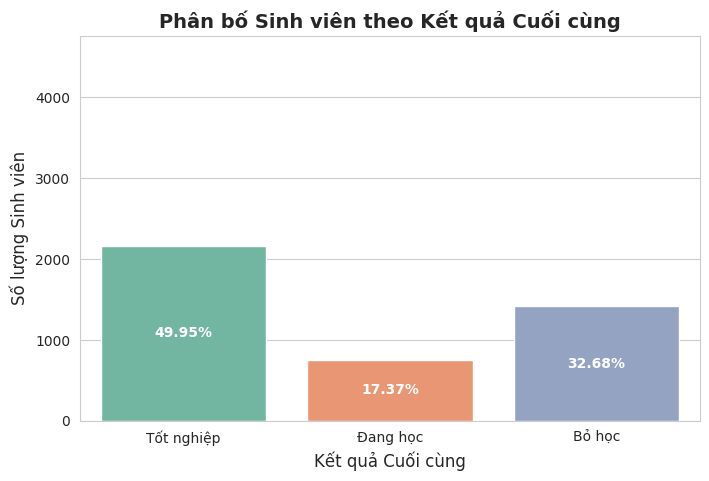

Target unique: ['Dropout' 'Graduate' 'Enrolled']
Target_VN unique: ['Bỏ học', 'Tốt nghiệp', 'Đang học']
Categories (3, object): ['Tốt nghiệp' < 'Đang học' < 'Bỏ học']


In [ ]:
# 1) Nếu cột Target hiện toàn NaN => khôi phục từ bản sao 'data' (hoặc đọc lại từ file)
if 'Target' not in df.columns or df['Target'].isna().all():
    if 'Target' in data.columns and data['Target'].notna().any():
        df['Target'] = data['Target']
    else:
        # Phòng khi 'data' cũng hỏng, đọc lại đúng cột từ file gốc
        df_target_only = pd.read_csv('dataset.csv', usecols=['Target'])
        df['Target'] = df_target_only['Target']

# 2) Chuẩn hoá về TIẾNG VIỆT 3 lớp vào cột mới (không ghi đè Target)
mapping_vn = {
    'Dropout': 'Bỏ học', 'Enrolled': 'Đang học', 'Graduate': 'Tốt nghiệp',
    'Bỏ học': 'Bỏ học', 'Đang học': 'Đang học', 'Tốt nghiệp': 'Tốt nghiệp'
}
df['Target_VN'] = df['Target'].map(mapping_vn)

# Nếu còn NaN (giá trị lạ), giữ nguyên cho đỡ mất dữ liệu
mask_na = df['Target_VN'].isna()
if mask_na.any():
    df.loc[mask_na, 'Target_VN'] = df.loc[mask_na, 'Target']

# 3) Vẽ biểu đồ với thứ tự cố định và nhãn %
order3 = ['Tốt nghiệp', 'Đang học', 'Bỏ học']
df['Target_VN'] = pd.Categorical(df['Target_VN'], categories=order3, ordered=True)

sns.set_style("whitegrid")
palette = sns.color_palette("Set2", n_colors=3)

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Target_VN', data=df, palette=palette, order=order3)

total = df['Target_VN'].notna().sum()
for p in ax.patches:
    h = p.get_height()
    pct = f'{100*h/total:.2f}%'
    ax.annotate(pct,
                (p.get_x()+p.get_width()/2, h/2),
                ha='center', va='center',
                fontsize=10, color='white', weight='bold')

plt.title('Phân bố Sinh viên theo Kết quả Cuối cùng', fontsize=14, fontweight='bold')
plt.xlabel('Kết quả Cuối cùng', fontsize=12)
plt.ylabel('Số lượng Sinh viên', fontsize=12)
plt.ylim(0, total*1.1)
plt.show()

# Kiểm tra lại cho chắc
print('Target unique:', df['Target'].unique())
print('Target_VN unique:', df['Target_VN'].unique())


<Figure size 1000x600 with 0 Axes>

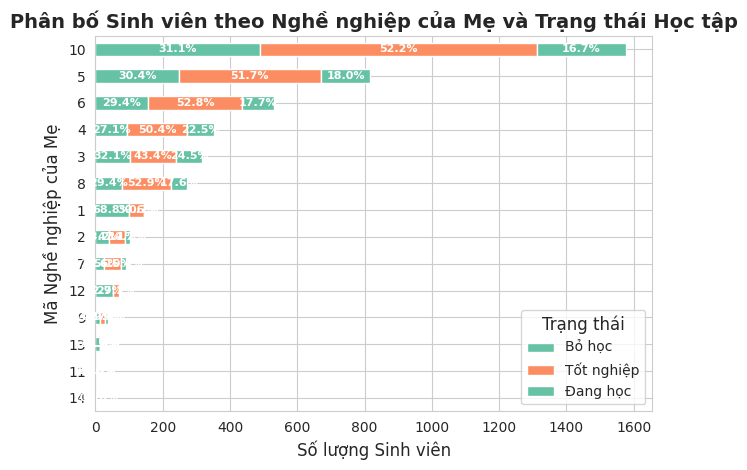

<Figure size 1000x600 with 0 Axes>

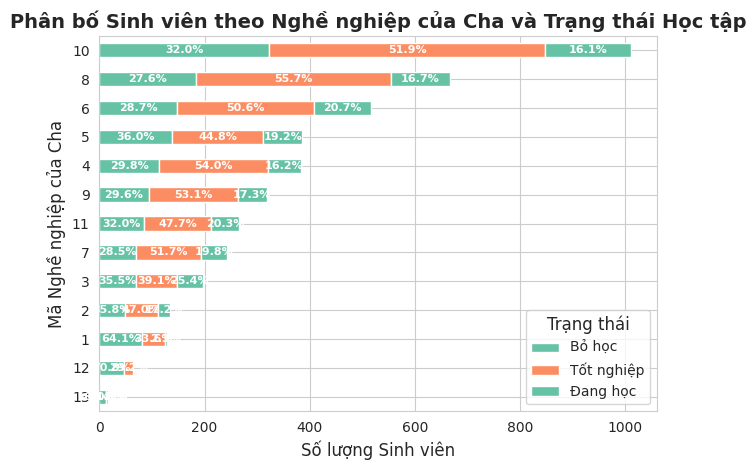


Số lượng sinh viên theo Nghề nghiệp của Mẹ và Trạng thái Học tập:
Target_Simplified    Bỏ học  Tốt nghiệp  Đang học
Mother's occupation                              
1                        99          44         1
2                        39          48        15
3                       102         138        78
4                        95         177        79
5                       248         422       147
6                       156         280        94
7                        26          51        14
8                        80         144        48
9                        15          14         7
10                      490         823       264
11                        1           1         2
12                       51          19         0
13                       13           2         2
14                        0           0         1

Số lượng sinh viên theo Nghề nghiệp của Cha và Trạng thái Học tập:
Target_Simplified    Bỏ học  Tốt nghiệp  Đang học
Father's occupa

In [ ]:
# Lọc các mã nghề nghiệp từ 1 đến 15
df = df[df['Mother\'s occupation'].isin(range(1, 16)) & df['Father\'s occupation'].isin(range(1, 16))]

# Tạo pivot table cho nghề nghiệp của mẹ
student_mother = df.groupby(['Mother\'s occupation', 'Target_Simplified']).size().unstack(fill_value=0)
student_mother_total = student_mother.sum(axis=1)
student_mother_sorted = student_mother_total.sort_values(ascending=True)

# Tạo pivot table cho nghề nghiệp của cha
student_father = df.groupby(['Father\'s occupation', 'Target_Simplified']).size().unstack(fill_value=0)
student_father_total = student_father.sum(axis=1)
student_father_sorted = student_father_total.sort_values(ascending=True)

# Thiết lập kiểu hiển thị và bảng màu
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", n_colors=2)

# Vẽ biểu đồ cột ngang xếp chồng cho nghề nghiệp của mẹ
plt.figure(figsize=(10, 6))
ax = student_mother.loc[student_mother_sorted.index].plot(kind='barh', stacked=True, color=palette)
plt.title('Phân bố Sinh viên theo Nghề nghiệp của Mẹ và Trạng thái Học tập', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng Sinh viên', fontsize=12)
plt.ylabel('Mã Nghề nghiệp của Mẹ', fontsize=12)
plt.legend(title='Trạng thái', fontsize=10, title_fontsize=12)

# Thêm nhãn phần trăm ở giữa các cột
for i, (index, row) in enumerate(student_mother.loc[student_mother_sorted.index].iterrows()):
    total = row.sum()
    cumsum = 0
    for j, value in enumerate(row):
        if value > 0:
            percentage = (value / total) * 100
            x = cumsum + value / 2
            y = i
            ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='center', fontsize=8, color='white', weight='bold')
        cumsum += value

plt.tight_layout()
plt.savefig('student_mother_occupation_distribution_simplified.png', dpi=300, bbox_inches='tight')
plt.show()

# Vẽ biểu đồ cột ngang xếp chồng cho nghề nghiệp của cha
plt.figure(figsize=(10, 6))
ax = student_father.loc[student_father_sorted.index].plot(kind='barh', stacked=True, color=palette)
plt.title('Phân bố Sinh viên theo Nghề nghiệp của Cha và Trạng thái Học tập', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng Sinh viên', fontsize=12)
plt.ylabel('Mã Nghề nghiệp của Cha', fontsize=12)
plt.legend(title='Trạng thái', fontsize=10, title_fontsize=12)

# Thêm nhãn phần trăm ở giữa các cột
for i, (index, row) in enumerate(student_father.loc[student_father_sorted.index].iterrows()):
    total = row.sum()
    cumsum = 0
    for j, value in enumerate(row):
        if value > 0:
            percentage = (value / total) * 100
            x = cumsum + value / 2
            y = i
            ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='center', fontsize=8, color='white', weight='bold')
        cumsum += value

plt.tight_layout()
# plt.savefig('student_father_occupation_distribution_simplified.png', dpi=300, bbox_inches='tight')
plt.show()

# In pivot table để xem số liệu chi tiết
print("\nSố lượng sinh viên theo Nghề nghiệp của Mẹ và Trạng thái Học tập:")
print(student_mother)
print("\nSố lượng sinh viên theo Nghề nghiệp của Cha và Trạng thái Học tập:")
print(student_father)

# Phần 3: Làm sạch dữ liệu

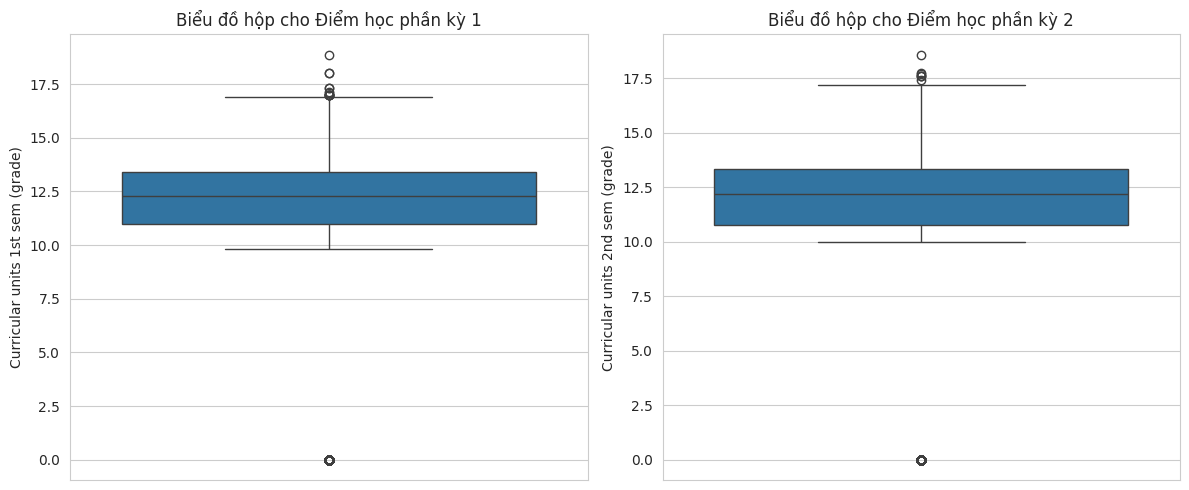

In [ ]:
# Sử dụng biểu đồ hộp để kiểm tra trực quan
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Curricular units 1st sem (grade)'])
plt.title('Biểu đồ hộp cho Điểm học phần kỳ 1')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Curricular units 2nd sem (grade)'])
plt.title('Biểu đồ hộp cho Điểm học phần kỳ 2')

plt.tight_layout()
plt.show()

- Hai kỳ học đều phân bố điểm khá giống nhau (mean ~12.5 và đều có giá trị ngoại lai ở cả 2 đầu boxplot)
- Trong thực tế, các giá trị ngoại lai này vẫn hợp lý vì phản ánh sự đa dạng tự nhiên trong kết quả học tập của sinh viên, do đó không cần loại bỏ.

In [ ]:
# Kiểm tra dữ liệu thiếu
def calc_null_rate(df):
    newdata = df.isnull().sum().to_frame('null_count')
    newdata[['null_rate']] = newdata[['null_count']] / len(df)
    return newdata.sort_values(by=['null_rate'], ascending=False)

calc_null_rate(df)

,null_count,null_rate
Marital status,0,0.00
Application mode,0,0.00
Application order,0,0.00
Course,0,0.00
Daytime/evening attendance,0,0.00
Previous qualification,0,0.00
Nacionality,0,0.00
Mother's qualification,0,0.00
Father's qualification,0,0.00
Mother's occupation,0,0.00


In [ ]:
# Đếm số dòng trùng lặp
duplicate_count = df.duplicated().sum()
print("Số dòng trùng lặp:", duplicate_count)

Số dòng trùng lặp: 0


In [ ]:
# Làm sạch tên cột
df.columns = df.columns.str.strip()  # Xóa khoảng trắng thừa
print("Tên cột sau khi làm sạch:")
print(df.columns.tolist())

Tên cột sau khi làm sạch:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target', 'Trạng thái học tập', 'Target_Simplified

# Phần 4: Trực quan hóa dữ liệu


Số lượng giá trị ngoại lệ trước khi xử lý: 652


/tmp/ipython-input-151576276.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Target'] = df_filtered['Target'].map(target_names_vn)
/tmp/ipython-input-151576276.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Curricular units 1st sem (grade)'] = df_filtered['Curricular units 1st sem (grade)'].clip(lower=lower_bound, upper=upper_bound)


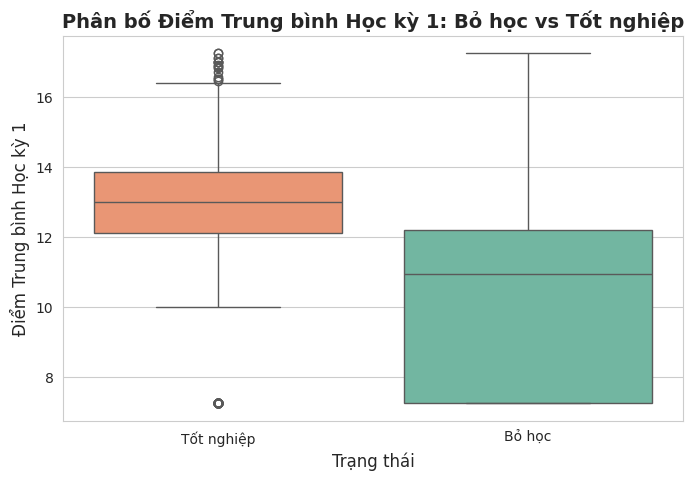


Thống kê mô tả điểm trung bình học kỳ 1 sau khi xử lý outliers:
             count  mean  std  min   25%   50%   75%   max
Target                                                    
Bỏ học     1421.00 10.16 2.60 7.25  7.25 10.93 12.20 17.25
Tốt nghiệp 2209.00 12.90 1.63 7.25 12.12 13.00 13.86 17.25


In [ ]:
# Lọc dữ liệu chỉ lấy nhóm Dropout và Graduate
df_filtered = data[data['Target'].isin(['Dropout', 'Graduate'])]

# Đổi tên Target sang tiếng Việt
target_names_vn = {
    'Dropout': 'Bỏ học',
    'Graduate': 'Tốt nghiệp'
}
df_filtered['Target'] = df_filtered['Target'].map(target_names_vn)

# Xử lý giá trị ngoại lệ cho Curricular units 1st sem (grade) bằng IQR
Q1 = df_filtered['Curricular units 1st sem (grade)'].quantile(0.25)
Q3 = df_filtered['Curricular units 1st sem (grade)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# In số lượng giá trị ngoại lệ trước khi xử lý
outliers_before = df_filtered['Curricular units 1st sem (grade)']
outliers_before = outliers_before[(outliers_before < lower_bound) | (outliers_before > upper_bound)]
print(f"\nSố lượng giá trị ngoại lệ trước khi xử lý: {len(outliers_before)}")

# Giới hạn (clip) các giá trị ngoại lệ
df_filtered['Curricular units 1st sem (grade)'] = df_filtered['Curricular units 1st sem (grade)'].clip(lower=lower_bound, upper=upper_bound)

# Thiết lập kiểu hiển thị và bảng màu
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", n_colors=2)

# Vẽ biểu đồ hộp
plt.figure(figsize=(8, 5))
sns.boxplot(x='Target', y='Curricular units 1st sem (grade)', data=df_filtered,
            palette=palette, hue='Target', order=['Tốt nghiệp', 'Bỏ học'], legend=False)
plt.title('Phân bố Điểm Trung bình Học kỳ 1: Bỏ học vs Tốt nghiệp', fontsize=14, fontweight='bold')
plt.xlabel('Trạng thái', fontsize=12)
plt.ylabel('Điểm Trung bình Học kỳ 1', fontsize=12)
plt.xticks(fontsize=10)

# Lưu biểu đồ
# plt.savefig('boxplot_sem1_grade_dropout_vs_graduate_vn.png', dpi=300, bbox_inches='tight')
plt.show()

# Tính thống kê mô tả cho điểm số học kỳ 1 sau khi xử lý outliers
print("\nThống kê mô tả điểm trung bình học kỳ 1 sau khi xử lý outliers:")
print(df_filtered.groupby('Target')['Curricular units 1st sem (grade)'].describe().round(2))


Tỷ lệ (%) sinh viên bỏ học theo tình trạng học bổng (Scholarship holder):
Series([], Name: proportion, dtype: float64)


/tmp/ipython-input-3864819842.py:34: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, total_dropout * 1.1)  # Mở rộng trục y để cột hiển thị rõ


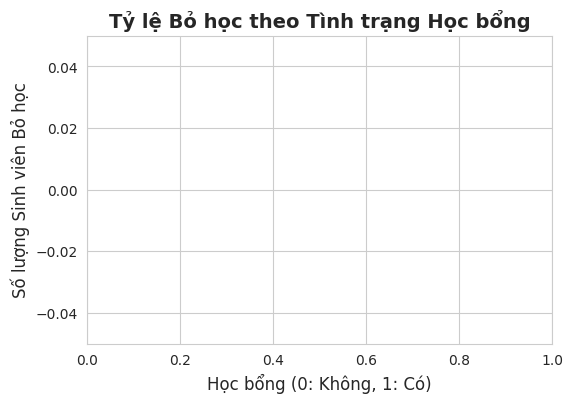

In [ ]:
# Lọc dữ liệu chỉ lấy nhóm Bỏ học
df_dropout = df[df['Target'] == 'Dropout']

# Đổi tên Target sang tiếng Việt
df_dropout['Target'] = df_dropout['Target'].replace('Dropout', 'Bỏ học')

# Tính tỷ lệ phần trăm Bỏ học theo Scholarship holder
dropout_by_scholarship = df_dropout['Scholarship holder'].value_counts(normalize=True) * 100
print("\nTỷ lệ (%) sinh viên bỏ học theo tình trạng học bổng (Scholarship holder):")
print(dropout_by_scholarship.round(2))

# Thiết lập kiểu hiển thị và bảng màu
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", n_colors=1)  # Một màu cho Bỏ học

# Vẽ biểu đồ cột
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Scholarship holder', data=df_dropout, palette=palette, order=[0, 1])

# Thêm nhãn phần trăm ở giữa các cột
total_dropout = len(df_dropout)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_dropout) * 100
    x = p.get_x() + p.get_width() / 2
    y = height / 2  # Đặt nhãn ở giữa cột
    ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='center', fontsize=10, color='white', weight='bold')

# Tùy chỉnh biểu đồ
plt.title('Tỷ lệ Bỏ học theo Tình trạng Học bổng', fontsize=14, fontweight='bold')
plt.xlabel('Học bổng (0: Không, 1: Có)', fontsize=12)
plt.ylabel('Số lượng Sinh viên Bỏ học', fontsize=12)
plt.xticks(fontsize=10)
plt.ylim(0, total_dropout * 1.1)  # Mở rộng trục y để cột hiển thị rõ

# Lưu biểu đồ
# plt.savefig('countplot_dropout_only_by_scholarship.png', dpi=300, bbox_inches='tight')
plt.show()


Số lượng giá trị ngoại lệ trước khi xử lý cho Curricular units 1st sem (grade): 723

Số lượng giá trị ngoại lệ trước khi xử lý cho Curricular units 2nd sem (grade): 868


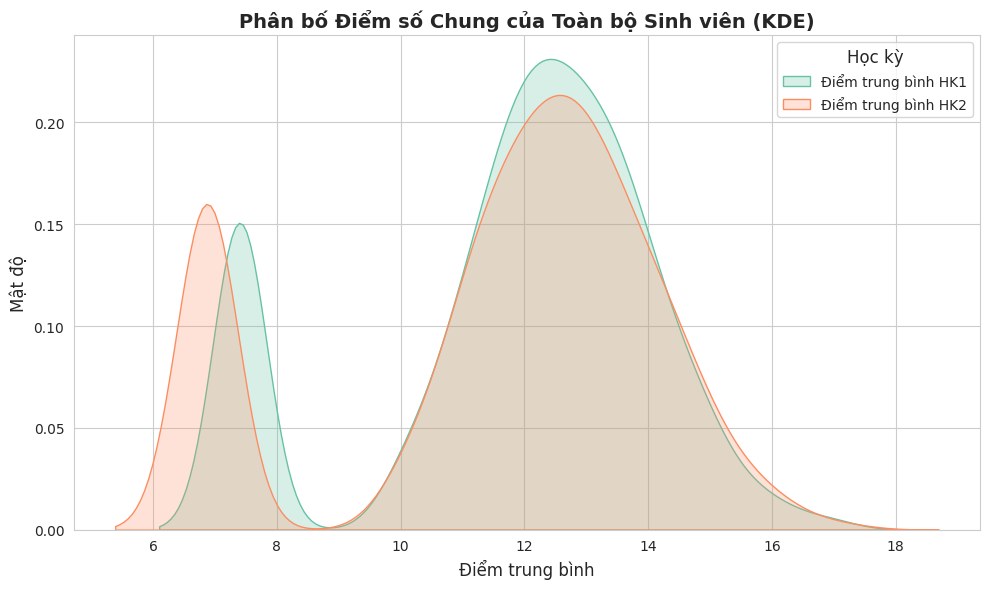


Thống kê mô tả điểm số học kỳ 1 và 2:
       Điểm trung bình HK1  Điểm trung bình HK2
count              4330.00              4330.00
mean                 11.83                11.57
std                   2.32                 2.65
min                   7.40                 6.87
25%                  11.00                10.75
50%                  12.29                12.20
75%                  13.40                13.33
max                  17.00                17.21


In [ ]:
# Chọn cột điểm số
grade_columns = ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# Xử lý giá trị ngoại lệ bằng IQR
for col in grade_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_before = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nSố lượng giá trị ngoại lệ trước khi xử lý cho {col}: {len(outliers_before)}")
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Thiết lập kiểu hiển thị và bảng màu
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", n_colors=2)

# Vẽ biểu đồ KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Curricular units 1st sem (grade)', label='Điểm trung bình HK1', color=palette[0], fill=True)
sns.kdeplot(data=df, x='Curricular units 2nd sem (grade)', label='Điểm trung bình HK2', color=palette[1], fill=True)
plt.title('Phân bố Điểm số Chung của Toàn bộ Sinh viên (KDE)', fontsize=14, fontweight='bold')
plt.xlabel('Điểm trung bình', fontsize=12)
plt.ylabel('Mật độ', fontsize=12)
plt.legend(title='Học kỳ', fontsize=10, title_fontsize=12)
plt.tight_layout()

# Lưu biểu đồ
plt.savefig('kde_grades_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Tính thống kê mô tả
print("\nThống kê mô tả điểm số học kỳ 1 và 2:")
stats = df[grade_columns].describe().round(2)
stats.columns = ['Điểm trung bình HK1', 'Điểm trung bình HK2']
print(stats)


Số lượng giá trị ngoại lệ trước khi xử lý cho Curricular units 1st sem (grade): 0

Số lượng giá trị ngoại lệ trước khi xử lý cho Curricular units 2nd sem (grade): 0


/tmp/ipython-input-4277908015.py:23: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.kdeplot(data=df, x='Curricular units 1st sem (grade)', hue='Target_Simplified',
/tmp/ipython-input-4277908015.py:30: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.kdeplot(data=df, x='Curricular units 2nd sem (grade)', hue='Target_Simplified',
/tmp/ipython-input-4277908015.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(title='Trạng thái', fontsize=10, title_fontsize=12, loc='center right', bbox_to_anchor=(1.15, 0.5))


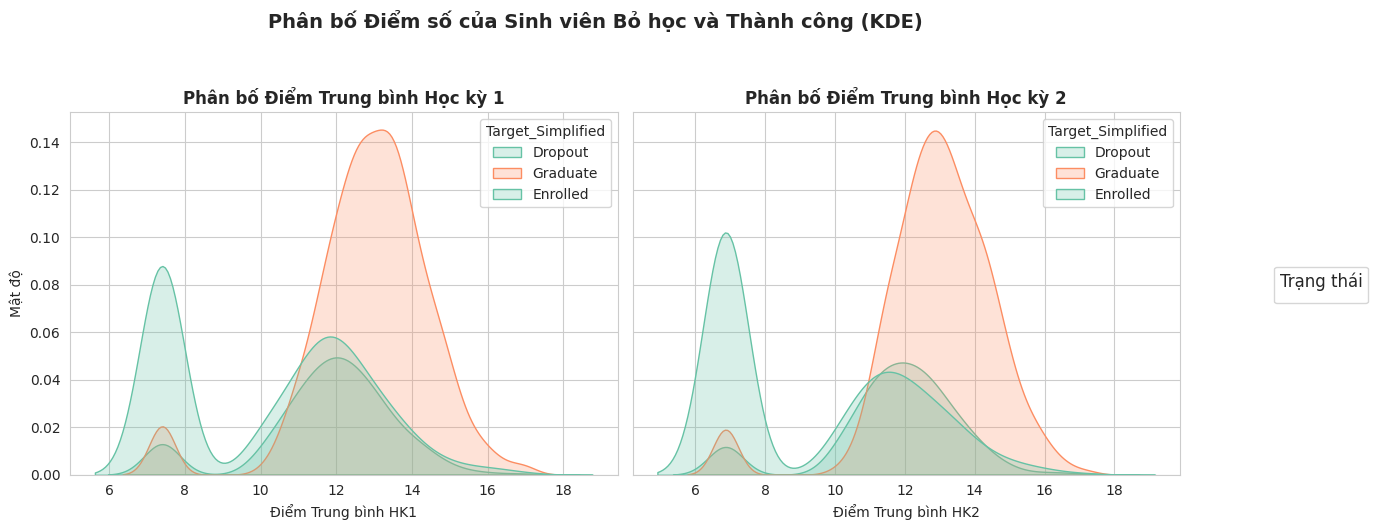


Thống kê mô tả điểm số học kỳ 1 và 2 theo nhóm Trạng thái:
                   Điểm trung bình HK1_count  Điểm trung bình HK1_mean  \
Target_Simplified                                                        
Dropout                              1415.00                     10.23   
Enrolled                              752.00                     11.78   
Graduate                             2163.00                     12.90   

                   Điểm trung bình HK1_std  Điểm trung bình HK1_min  \
Target_Simplified                                                     
Dropout                               2.53                     7.40   
Enrolled                              1.80                     7.40   
Graduate                              1.61                     7.40   

                   Điểm trung bình HK1_25%  Điểm trung bình HK1_50%  \
Target_Simplified                                                     
Dropout                               7.40                    11.00   


In [ ]:


# Chọn cột điểm số
grade_columns = ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# Xử lý giá trị ngoại lệ bằng IQR
for col in grade_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_before = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nSố lượng giá trị ngoại lệ trước khi xử lý cho {col}: {len(outliers_before)}")
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Thiết lập kiểu hiển thị và bảng màu
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", n_colors=2)

# Vẽ biểu đồ KDE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# KDE cho học kỳ 1
sns.kdeplot(data=df, x='Curricular units 1st sem (grade)', hue='Target_Simplified',
            palette=palette, fill=True, ax=ax1)
ax1.set_title('Phân bố Điểm Trung bình Học kỳ 1', fontsize=12, fontweight='bold')
ax1.set_xlabel('Điểm Trung bình HK1', fontsize=10)
ax1.set_ylabel('Mật độ', fontsize=10)

# KDE cho học kỳ 2
sns.kdeplot(data=df, x='Curricular units 2nd sem (grade)', hue='Target_Simplified',
            palette=palette, fill=True, ax=ax2)
ax2.set_title('Phân bố Điểm Trung bình Học kỳ 2', fontsize=12, fontweight='bold')
ax2.set_xlabel('Điểm Trung bình HK2', fontsize=10)
ax2.set_ylabel('Mật độ', fontsize=10)

# Thêm chú thích chung
fig.legend(title='Trạng thái', fontsize=10, title_fontsize=12, loc='center right', bbox_to_anchor=(1.15, 0.5))

# Thêm tiêu đề chung
fig.suptitle('Phân bố Điểm số của Sinh viên Bỏ học và Thành công (KDE)', fontsize=14, fontweight='bold', y=1.05)

# Tối ưu hóa bố cục
plt.tight_layout()

# Lưu biểu đồ
# plt.savefig('kde_grades_by_target_simplified.png', dpi=300, bbox_inches='tight')
plt.show()

# Tính thống kê mô tả
print("\nThống kê mô tả điểm số học kỳ 1 và 2 theo nhóm Trạng thái:")
stats = df.groupby('Target_Simplified')[grade_columns].describe().round(2)
stats.columns = [f"{'Điểm trung bình HK1' if col[0] == 'Curricular units 1st sem (grade)' else 'Điểm trung bình HK2'}_{col[1]}" for col in stats.columns]
print(stats)


Kết quả cho mô hình Hồi quy Logistic:
Độ chính xác: 86.5 %
Báo cáo phân loại:
              precision    recall  f1-score   support

      Bỏ học       0.86      0.77      0.81       277
  Tốt nghiệp       0.87      0.92      0.89       449

    accuracy                           0.87       726
   macro avg       0.86      0.85      0.85       726
weighted avg       0.86      0.87      0.86       726


Kết quả cho mô hình DecisionTree:
Độ chính xác: 78.37 %
Báo cáo phân loại:
              precision    recall  f1-score   support

      Bỏ học       0.72      0.71      0.72       277
  Tốt nghiệp       0.82      0.83      0.83       449

    accuracy                           0.78       726
   macro avg       0.77      0.77      0.77       726
weighted avg       0.78      0.78      0.78       726


Kết quả cho mô hình RandomForest:
Độ chính xác: 83.75 %
Báo cáo phân loại:
              precision    recall  f1-score   support

      Bỏ học       0.83      0.73      0.77       277
  Tốt 

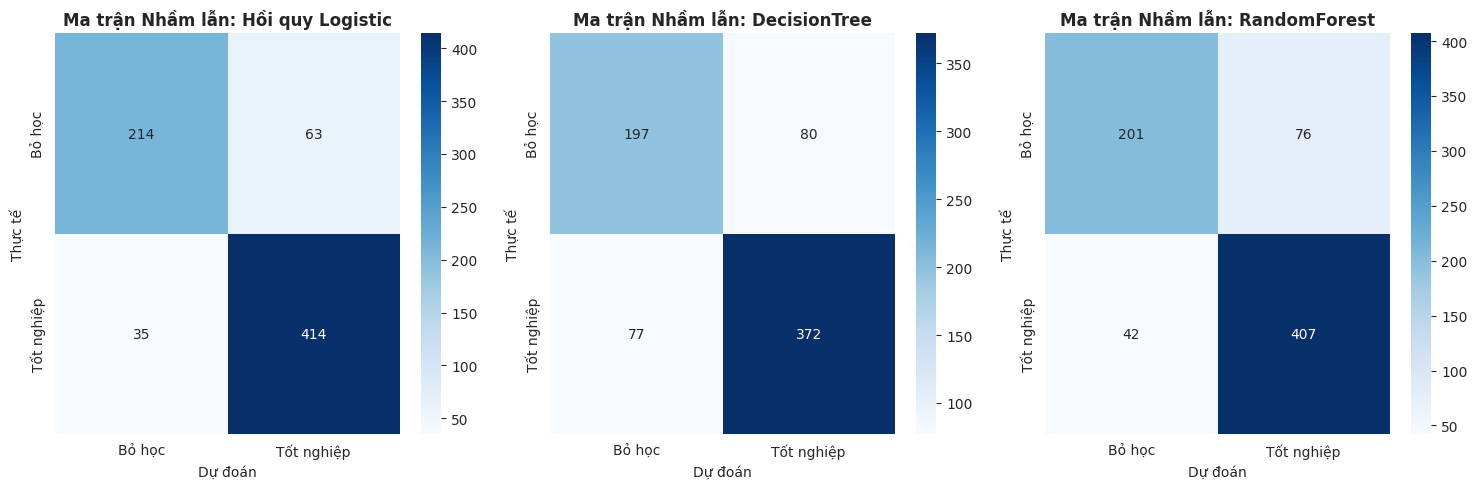

/tmp/ipython-input-4024509494.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.values()), y=list(accuracies.keys()), palette='Set2')


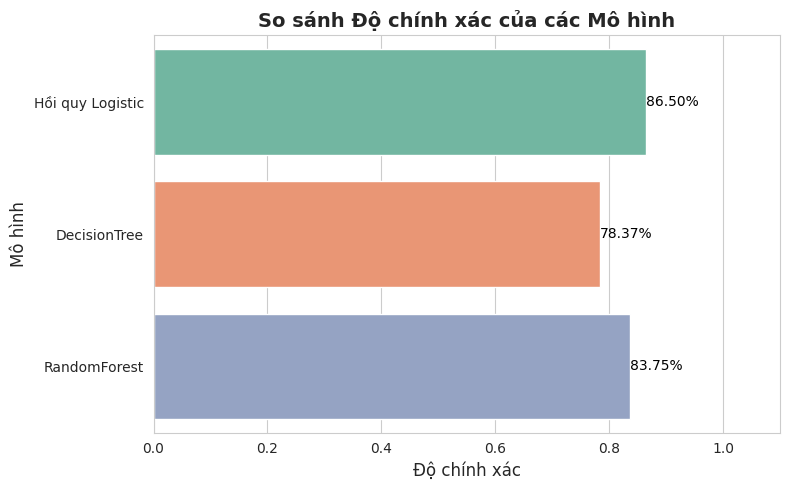

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



# Chọn các đặc trưng từ học kỳ 1
features = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)'
]


# Chuẩn bị dữ liệu
X = df_filtered[features]
y = df_filtered['Target'].map({'Tốt nghiệp': 1, 'Bỏ học': 0})  # Mã hóa nhị phân: Tốt nghiệp=1, Bỏ học=0

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Danh sách mô hình
models = {
    'Hồi quy Logistic': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42)
}

# Lưu trữ độ chính xác
accuracies = {}

# Huấn luyện và đánh giá từng mô hình
plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(models.items(), 1):
    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Tính độ chính xác
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

    # In báo cáo phân loại
    print(f"\nKết quả cho mô hình {name}:")
    print("Độ chính xác:", round(accuracy * 100, 2), "%")
    print("Báo cáo phân loại:")
    print(classification_report(y_test, y_pred, target_names=['Bỏ học', 'Tốt nghiệp']))

    # Vẽ ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bỏ học', 'Tốt nghiệp'], yticklabels=['Bỏ học', 'Tốt nghiệp'])
    plt.title(f'Ma trận Nhầm lẫn: {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Dự đoán', fontsize=10)
    plt.ylabel('Thực tế', fontsize=10)

# Tối ưu hóa bố cục và lưu ma trận nhầm lẫn
plt.tight_layout()
plt.savefig('confusion_matrices_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Vẽ biểu đồ so sánh độ chính xác
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.values()), y=list(accuracies.keys()), palette='Set2')
plt.title('So sánh Độ chính xác của các Mô hình', fontsize=14, fontweight='bold')
plt.xlabel('Độ chính xác', fontsize=12)
plt.ylabel('Mô hình', fontsize=12)
for i, v in enumerate(accuracies.values()):
    plt.text(v, i, f'{v*100:.2f}%', va='center', ha='left', fontsize=10, color='black')
plt.xlim(0, 1.1)
plt.tight_layout()
# plt.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')
# plt.show()